# Polynomial Regression

Reference: [Introduction to Statistical Learning (Free ebook online)](https://www.statlearning.com/)

## Load all the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib tutorials & Examples: here

## Synthesize Data

In [ ]:
# Generate data
x0, x1 = -0.25, 1.5
x = np.linspace(x0, x1, 100)
coefficients = [4, -7, 2, -4]  # coefficients for a quadratic polynomial: 4x^3 -7*x^2 - 2x -4

# Calculate y values
global y_population
y_population = np.polyval(coefficients, x)

In [ ]:
np.random.seed(123456789)
n_gt = 40

# Generate random points from the polynomial function with noise
x_gt_1d = np.random.uniform(low=x0, high=x1, size=n_gt)
y_gt = np.random.normal(0, 0.4, n_gt) + np.polyval(coefficients, x_gt_1d)

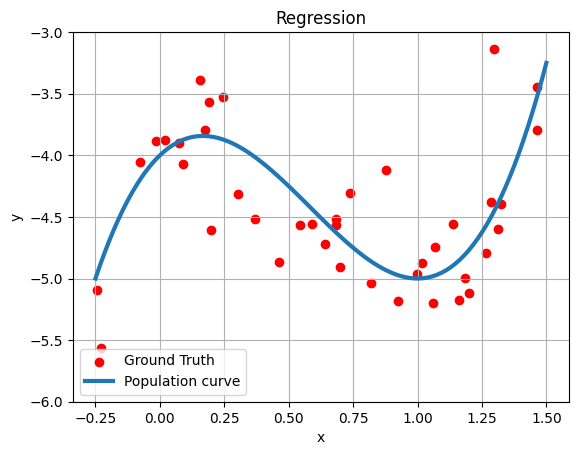

In [ ]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the polynomial
ax.set(xlabel='x', ylabel='y', title='Regression')
ax.scatter(x_gt_1d, y_gt, label='Ground Truth', c='r')
ax.plot(x, y_population, label='Population curve', lw=3)
ax.set_ylim([-6, -3])

ax.legend()
ax.grid(True)

# Show the plot
plt.show()

## Create Train and Test data sets

In [ ]:
from sklearn.model_selection import train_test_split

Converting x which is an 1d vector to a 2d array. Sklearn assumes that the feature array is 2d. Documentation too uses 'X' and not 'x'.

In [ ]:
x_gt = x_gt_1d[:, np.newaxis]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_gt, y_gt, train_size = 0.7, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28, 1), (12, 1), (28,), (12,))

## Generate Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_feature_pipeline = PolynomialFeatures((0,12))

## Regression using the analytical expression

In [ ]:
from numpy.linalg import inv

from sklearn.metrics import mean_squared_error

In [ ]:
X_train = polynomial_feature_pipeline.fit_transform(x_train)

Alias for the variables for brevity

In [ ]:
X = X_train
y = y_train

XT = X.T

In [ ]:
theta = inv(XT @ X) @ XT @ y

In [ ]:
yhat_train = X @ theta
train_rmse = mean_squared_error(y_train, yhat_train, squared=False)

In [ ]:
X_test = polynomial_feature_pipeline.transform(x_test)
yhat_test = X_test @ theta
test_rmse = mean_squared_error(y_test, yhat_test, squared=False)

In [ ]:
Xfit = polynomial_feature_pipeline.transform(x[:, np.newaxis])
yfit = Xfit @ theta

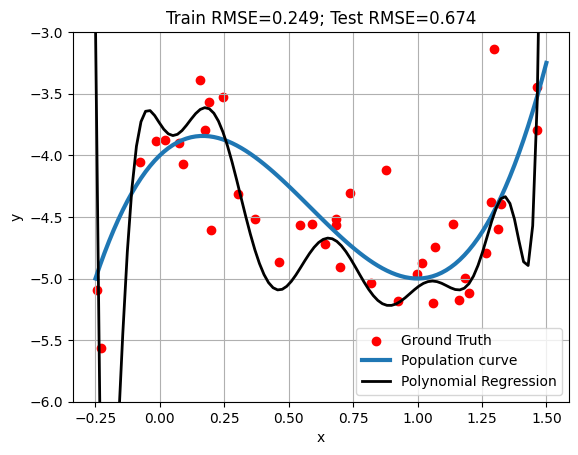

In [ ]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the polynomial
ax.set(xlabel='x', ylabel='y', title=f'Train RMSE={train_rmse:.3f}; Test RMSE={test_rmse:.3f}')
ax.scatter(x_gt, y_gt, label='Ground Truth', c='r')
ax.plot(x, y_population, label='Population curve', lw=3)
ax.plot(x, yfit, label='Polynomial Regression', lw=2, c='black')

ax.set_ylim([-6, -3])
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

Why don't we use closed-form solution for linear regression:
[Cross Validated Discussion](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution)